In [1]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
import pycbc
from pycbc.psd import read, interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
from pycbc.noise import gaussian
from pycbc.waveform import get_fd_waveform
from pycbc.types import FrequencySeries, TimeSeries
from matplotlib import rc, rcParams
import seaborn as sns


plt.rcParams['agg.path.chunksize'] = 100000000
rc_params = {'axes.labelsize': 12,
             'axes.titlesize': 16,
             'font.size': 16,
             'lines.linewidth' : 3,
             'legend.fontsize': 14,
             'xtick.labelsize': 14,
             'ytick.labelsize': 14,
             'text.usetex' : True,
            }
rcParams.update(rc_params)

from matplotlib import rc

rc('text.latex', preamble='\\usepackage{txfonts}')
rc('text', usetex=True)
rc('font', family='serif')
rc('font', serif='times')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=2)

sns.set_theme(style="whitegrid")

In [2]:
psd_model = 'H1L1V1_O5_psd'
asd_fname_H1 = 'AplusDesign.txt'
asd_fname_L1 = 'AplusDesign.txt'
asd_fname_V1 = 'avirgo_O5high_NEW.txt'
f_H1, asd_H1 = np.loadtxt(asd_fname_H1, unpack=True)
f_L1, asd_L1 = np.loadtxt(asd_fname_L1, unpack=True)
f_V1, asd_V1 = np.loadtxt(asd_fname_V1, unpack=True)
psd_H1 = asd_H1**2
psd_L1 = asd_L1**2 
psd_V1 = asd_V1**2 

In [7]:
f_deci = np.logspace(-3.5,np.log10(5000),len(f_H1))
idx = np.zeros([3,1]) # Needed for array broadcasting

idx[:,0] = [-2, 0, 1] # Indices of the power law components
amp = [1e-25, 1e-23, 1e-24] # Amplitude of each power-law component


asd_deci = np.dot(amp, np.power(f_deci,idx)) # Toy sensitivity   

psd_deci = asd_deci**2
psd_deci = np.array(psd_deci)

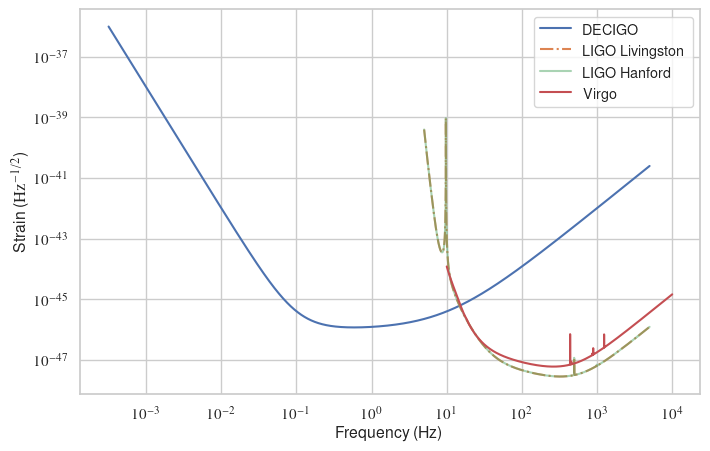

In [6]:
plt.figure(figsize = [8,5])
plt.loglog(f_deci, psd_deci, label = 'DECIGO')
plt.loglog(f_L1, psd_L1, label='LIGO Livingston', linestyle='-.')
plt.loglog(f_H1, psd_H1, label = 'LIGO Hanford', alpha=0.5)
plt.loglog(f_V1, psd_V1, label='Virgo')
plt.ylabel('Strain ($\mathrm{Hz}^{-1/2}$)')        
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()